In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv("Salary_Data.csv")

In [6]:
data.head()

,YearsExperience,Salary,Unnamed: 2
0,1.1,39343,NaN
1,1.3,46205,COVAR
2,1.5,37731,NaN
3,2.0,43525,NaN
4,2.2,39891,NaN


In [7]:
data.tail()

,YearsExperience,Salary,Unnamed: 2
25,9.0,105582,NaN
26,9.5,116969,NaN
27,9.6,112635,NaN
28,10.3,122391,NaN
29,10.5,121872,NaN


In [8]:
data.isnull().sum()

YearsExperience     0
Salary              0
Unnamed: 2         29
dtype: int64

In [64]:
data.isnull()

,YearsExperience,Salary,Unnamed: 2
0,False,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,False,False,True
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,False,True


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
 2   Unnamed: 2       1 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [66]:
import matplotlib.pyplot as plt

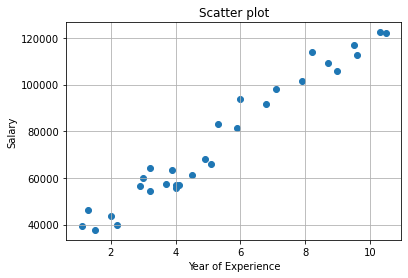

In [68]:
plt.scatter(data["YearsExperience"],data["Salary"])
plt.title("Scatter plot")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.grid()
plt.show()

In [11]:
import seaborn as sns

## Getting regression line in scatter plot

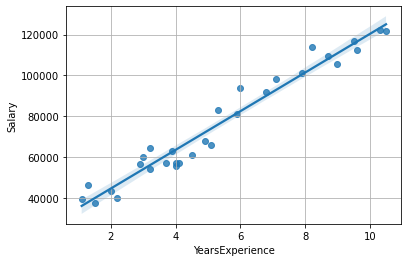

In [12]:
sns.regplot(x="YearsExperience", y="Salary", data=data)
plt.grid()
plt.show()

## How to get Correlation of data?

In [13]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Arranging the data as per Regression Algorithm

In [14]:
X=data[["YearsExperience"]] 
y=data[["Salary"]] 


## Ordinary Least Square(OLS) Model


In [15]:
import statsmodels.api as sm 

In [16]:
X_1 = sm.add_constant(X)

In [17]:
lm = sm.OLS(y, X_1)
lm = lm.fit() 

In [18]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        22:29:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
exp = 15

In [20]:
salary = 9449.9 * exp + 2579
salary

144327.5

## Train Test Split
Model will be build on train data only 

In [21]:
X = data[["YearsExperience"]]    # Input data 
y = data[["Salary"]]             # Output data

In [22]:
# To split data
from sklearn.model_selection import train_test_split

In [23]:
#30 obvs = 24 obvs (Train) + 6 obvs (Test)

In [24]:
# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)   # 70-30 Split

In [25]:
X_train.shape , y_train.shape    # Check dimension of train data 

((24, 1), (24, 1))

In [26]:
X_test.shape , y_test.shape      # Check dimension of test data

((6, 1), (6, 1))

In [27]:
X_train

,YearsExperience
27,9.6
25,9.0
6,3.0
17,5.3
22,7.9
11,4.0
4,2.2
29,10.5
0,1.1
1,1.3


## build model using Train Data

In [28]:
X_train_1 = sm.add_constant(X_train)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()   

In [29]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     430.7
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           6.14e-16
Time:                        22:29:42   Log-Likelihood:                -241.95
No. Observations:                  24   AIC:                             487.9
Df Residuals:                      22   BIC:                             490.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.682e+04   2651.410     10.115      0.000    2.13e+04    3.23e+04
YearsExperience  9361.1164    451.066     20.753      0.000    8425.664    1.03e+04
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.237
Skew:                           0.265   Prob(JB):                        0.539
Kurtosis:                       2.022   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
lm.params

const              26819.065119
YearsExperience     9361.116390
dtype: float64

# test our trained model on test data

In [31]:
X_test

,YearsExperience
9,3.7
26,9.5
28,10.3
13,4.1
5,2.9
12,4.0


In [32]:
X_test_1 = sm.add_constant(X_test)    # Adds Intercept 

# Predicting the Salary for the Test values
y_pred = lm.predict(X_test_1)
y_pred

9      61455.195763
26    115749.670827
28    123238.563939
13     65199.642319
5      53966.302651
12     64263.530680
dtype: float64

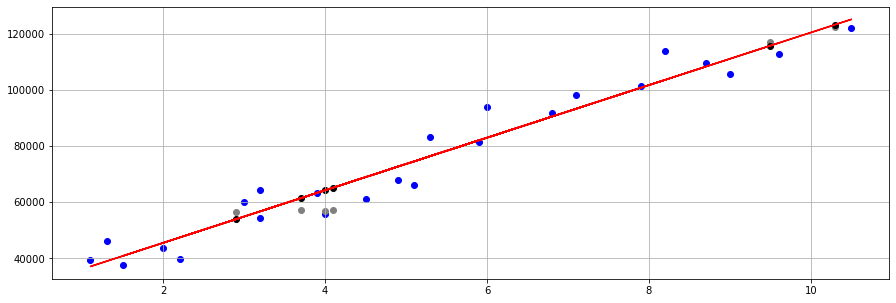

In [33]:
plt.figure(figsize = (15,5))
plt.plot(X_train, lm.predict(X_train_1),  color='red')  # beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='grey')
plt.scatter(X_test, lm.predict(X_test_1),  color='black')    # y_pred = lm.predict(test)  -- Test  data 
plt.grid()
plt.show()

# Error evalution metrics

In [34]:
## Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
import numpy as np

In [36]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)    # to be only of test data (how much is the score in surprise test?)
rmse = np.sqrt(mse)
rmse

4947.4345968042635

In [37]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)    # On test data (In summary output its on train data)
rsq

0.9720725422361337

# Concluding statement 
We can conclude that 97.2% of SST can be explained by using this regression equation to predict salary on test data. The remainder is error


In [38]:
testing_data=pd.DataFrame()

In [39]:
testing_data

""


In [40]:
testing_data=X_test

In [41]:
testing_data["Actuals"]=y_test["Salary"]
testing_data["Predictions"]=y_pred
testing_data["Error"]=testing_data["Actuals"]-testing_data["Predictions"]

In [42]:
testing_data

,YearsExperience,Actuals,Predictions,Error
9,3.7,57189,61455.195763,-4266.195763
26,9.5,116969,115749.670827,1219.329173
28,10.3,122391,123238.563939,-847.563939
13,4.1,57081,65199.642319,-8118.642319
5,2.9,56642,53966.302651,2675.697349
12,4.0,56957,64263.530680,-7306.530680


In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mse=mean_squared_error(testing_data["Actuals"], testing_data["Predictions"])
print("MSE: " , round(mse,2))

MSE:  24477109.09


In [45]:
rmse=np.sqrt(mse)
print("RMSE: ", round(rmse,2))

RMSE:  4947.43


In [46]:
from sklearn.metrics import r2_score

In [47]:
rsq=r2_score(testing_data["Actuals"], testing_data["Predictions"])
print("R Square: " , round(rsq,3))

R Square:  0.972


In [48]:
testing_data.corr()

,YearsExperience,Actuals,Predictions,Error
YearsExperience,1.000000,0.991804,1.000000,0.383987
Actuals,0.991804,1.000000,0.991804,0.498812
Predictions,1.000000,0.991804,1.000000,0.383987
Error,0.383987,0.498812,0.383987,1.000000


# R2 Formula

In [49]:
SST=sum((testing_data["Actuals"]-y["Salary"].mean())**2)

In [50]:
SST

5279666817.0

In [51]:
SSE=sum((testing_data["Actuals"]-testing_data["Predictions"])**2)

In [52]:
SSE

146862654.5379346

In [53]:
R2=1-(SSE/SST)
R2

0.9721833479974434

Advantage:This doesn't require add constant

Disadvantage:It doesn't give summary table

OLS takes y first then X

sklearn takes X first then y

In [54]:
# import SLR library
from sklearn.linear_model import LinearRegression

In [55]:
lr=LinearRegression()

In [56]:
#split data for train & test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=100)

In [57]:
#Fit the linear model
lr=lr.fit(X_train, y_train)

In [58]:
lr

LinearRegression()

In [59]:
lr.coef_

array([[9361.11639032]])

In [60]:
lr.intercept_

array([26819.0651187])

In [61]:
y_pred_lr=lr.predict(X_test)

In [62]:
rsq=r2_score(y_test, y_pred_lr)

In [63]:
print("R Sqaure: ", round(rsq,3))

R Sqaure:  0.972
